In [1]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [45]:
age_series = pd.Series([25, 30, 35])
age_series

0    25
1    30
2    35
dtype: int64

In [2]:
df = pd.read_csv('appartements.csv')
df

,nbRooms,surface,nbWindows,price,id
0,4,57,8,202956,6
1,5,46,6,148352,7
2,3,102,8,337699,8
3,5,101,9,347944,9
4,5,41,4,155493,10
...,...,...,...,...,...
95,3,91,2,293614,101
96,5,66,2,231358,102
97,2,126,2,392919,103
98,2,80,6,257853,104


In [48]:
df_filtered = df[df['nbRooms'] > 3]
df_filtered

,nbRooms,surface,nbWindows,price,id
0,4,57,8,202956,6
1,5,36,6,148352,7
3,5,101,9,347944,9
4,5,41,4,155493,10
9,5,52,2,186015,15
10,4,91,3,295218,16
12,5,66,5,232735,18
14,4,73,8,259146,20
16,4,115,1,365446,22
17,5,120,2,385045,23


In [50]:
surfaces = df['surface']
surfaces

0      57
1      36
2     102
3     101
4      41
     ... 
95     91
96     66
97    126
98     80
99    135
Name: surface, Length: 100, dtype: int64

In [52]:
df['price_per_m2'] = df['price'] / df['surface']
df

,nbRooms,surface,nbWindows,price,id,price_per_m2
0,4,57,8,202956,6,3560.631579
1,5,36,6,148352,7,4120.888889
2,3,102,8,337699,8,3310.774510
3,5,101,9,347944,9,3444.990099
4,5,41,4,155493,10,3792.512195
...,...,...,...,...,...,...
95,3,91,2,293614,101,3226.527473
96,5,66,2,231358,102,3505.424242
97,2,126,2,392919,103,3118.404762
98,2,80,6,257853,104,3223.162500


In [53]:
df.isnull().sum()

nbRooms         0
surface         0
nbWindows       0
price           0
id              0
price_per_m2    0
dtype: int64

remplissage de valeurs manquantes

In [55]:
df['surface'].fillna(df['surface'].mean(), inplace=True)
df

,nbRooms,surface,nbWindows,price,id,price_per_m2
0,4,57,8,202956,6,3560.631579
1,5,36,6,148352,7,4120.888889
2,3,102,8,337699,8,3310.774510
3,5,101,9,347944,9,3444.990099
4,5,41,4,155493,10,3792.512195
...,...,...,...,...,...,...
95,3,91,2,293614,101,3226.527473
96,5,66,2,231358,102,3505.424242
97,2,126,2,392919,103,3118.404762
98,2,80,6,257853,104,3223.162500


In [57]:
avg_price_by_rooms = df.groupby('nbRooms')['price'].mean()
avg_price_by_rooms

nbRooms
1    267517.555556
2    331412.666667
3    268999.937500
4    300148.846154
5    298802.842105
Name: price, dtype: float64

In [59]:
surface_by_rooms = df.groupby('nbRooms')['surface'].sum()
surface_by_rooms

nbRooms
1    1520
2    2190
3    1294
4    2354
5    1677
Name: surface, dtype: int64

In [1]:
import pandas as pd

# Charger le fichier CSV
file_path = './appartements.csv'
df = pd.read_csv(file_path)

# Afficher un aperçu du fichier pour comprendre sa structure
df.head()

,nbRooms,surface,nbWindows,price,id
0,4,57,8,202956,6
1,5,36,6,148352,7
2,3,102,8,337699,8
3,5,101,9,347944,9
4,5,41,4,155493,10


In [3]:
# Vérifier s'il y a des lignes sans prix
df_missing_prices = df[df['price'].isnull()]

# Si des prix manquent, afficher le nombre de lignes concernées
print(df_missing_prices.shape[0])

0


Statistiques descriptives


In [5]:
# Statistiques de base pour chaque colonne
stats = df.describe()
stats

,nbRooms,surface,nbWindows,price,id
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.070000,90.350000,4.680000,295601.050000,55.500000
std,1.401695,35.512802,2.703832,106559.203374,29.011492
min,1.000000,30.000000,1.000000,102225.000000,6.000000
25%,2.000000,58.750000,2.000000,202944.750000,30.750000
50%,3.000000,91.000000,4.000000,295102.000000,55.500000
75%,4.000000,123.500000,7.000000,392080.500000,80.250000
max,5.000000,148.000000,9.000000,478600.000000,105.000000


. Tri des données

In [7]:
# Trier les appartements par prix (du plus cher au moins cher)
sorted_by_price = df.sort_values(by='price', ascending=False)
sorted_by_price.head()

,nbRooms,surface,nbWindows,price,id
28,4,148,7,478600,34
8,3,148,7,477719,14
77,4,148,3,470596,83
59,2,144,9,461709,65
42,4,142,6,456420,48


Filtrer les données

In [8]:
# Filtrer les appartements avec une surface supérieure à 100m² et plus de 3 chambres
large_apartments = df[(
    df['surface'] > 100) & (df['nbRooms'] > 3)]
large_apartments

,nbRooms,surface,nbWindows,price,id
3,5,101,9,347944,9
16,4,115,1,365446,22
17,5,120,2,385045,23
21,5,130,5,428754,27
28,4,148,7,478600,34
35,5,119,5,394339,41
37,5,106,2,344205,43
40,4,125,1,393060,46
42,4,142,6,456420,48
47,5,130,3,421088,53


Groupement et agrégation

In [10]:
# Moyenne des prix par nombre de chambres
avg_price_by_rooms = df.groupby('nbRooms')['price'].mean()
avg_price_by_rooms

nbRooms
1    267517.555556
2    331412.666667
3    268999.937500
4    300148.846154
5    298802.842105
Name: price, dtype: float64

In [11]:
# Créer une nouvelle colonne "price_per_m2" qui représente le prix par mètre carré
df['price_per_m2'] = df['price'] / \
    df['surface']
df.head()

,nbRooms,surface,nbWindows,price,id,price_per_m2
0,4,57,8,202956,6,3560.631579
1,5,36,6,148352,7,4120.888889
2,3,102,8,337699,8,3310.774510
3,5,101,9,347944,9,3444.990099
4,5,41,4,155493,10,3792.512195


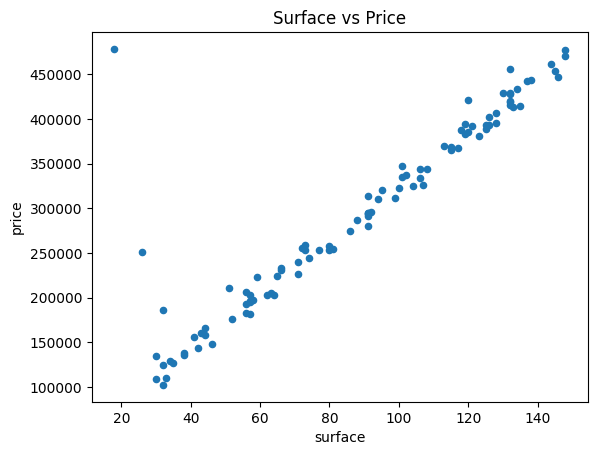

In [3]:
import matplotlib.pyplot as plt

# Graphique montrant la relation entre la surface et le prix
df.plot(kind='scatter', x='surface',
                    y='price', title='Surface vs Price')
plt.show()

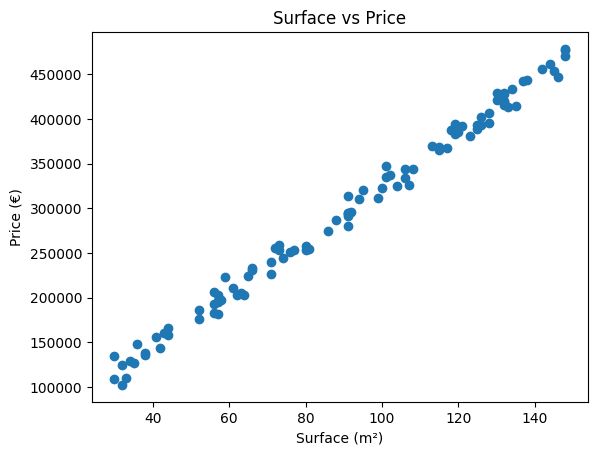

In [15]:
import matplotlib.pyplot as plt

# Visualiser la relation entre surface et prix
plt.scatter(df['surface'], df['price'])
plt.title('Surface vs Price')
plt.xlabel('Surface (m²)')
plt.ylabel('Price (€)')
plt.show()

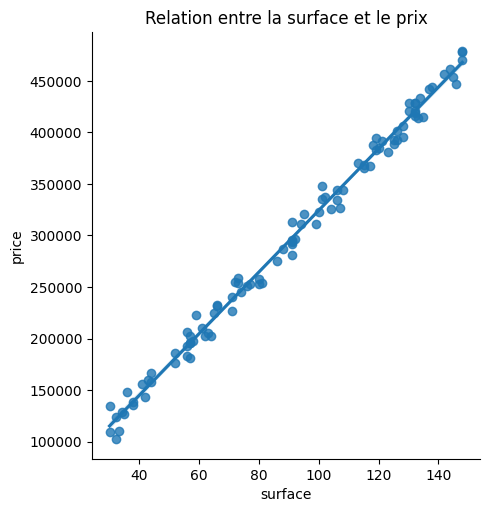

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la relation entre la surface et le prix avec une régression linéaire
sns.lmplot(x='surface', y='price', data=df)
plt.title("Relation entre la surface et le prix")
plt.show()

Distribution du prix des appartements
La visualisation et SciPy pour des statistiques avancées, appliqués à ton DataFrame d'appartements.

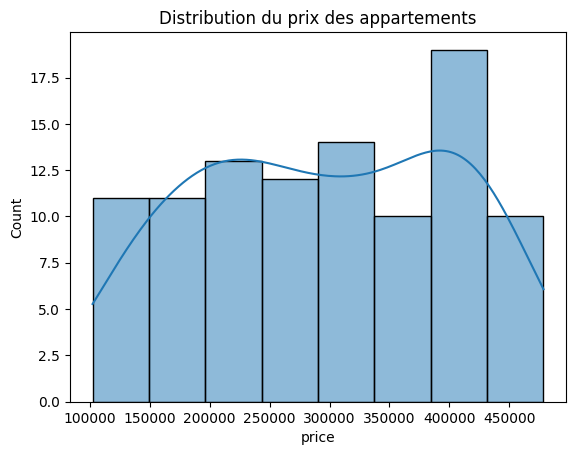

In [19]:
# Tracer la distribution des prix
sns.histplot(df['price'], kde=True)
plt.title("Distribution du prix des appartements")
plt.show()

SciPy :

Le test de corrélation de Pearson entre la surface et le prix a donné un coefficient de corrélation très élevé (0.996), indiquant une forte corrélation positive. La p-value très faible (< 0.001) suggère que cette corrélation est statistiquement significative.

Le test de normalité de Shapiro-Wilk sur la distribution des pr ix a donné une statistique de 0.955 et une p-value de 0.00185, ce qui signifie que les prix ne suivent pas exactement une distribution normale (selon un seuil de significativité de 0.05)

In [21]:
from scipy.stats import pearsonr

# Calculer le coefficient de corrélation de Pearson entre surface et prix
corr, p_value = pearsonr(df['surface'], df['price'])

# Affichage des résultats
print(f"Coefficient de corrélation de Pearson: {corr}, p-value: {p_value}")

Coefficient de corrélation de Pearson: 0.9962094606321493, p-value: 9.403387007037616e-106


 Test t de Student (t-test)
Le test t de Student est utilisé pour comparer les moyennes de deux échantillons et voir s'il existe une différence statistiquement significative entre ces deux groupes.

In [23]:
from scipy.stats import ttest_ind

# Diviser les appartements en deux groupes selon le nombre de chambres
group1 = df[df['nbRooms'] > 3]['price']
group2 = df[df['nbRooms'] <= 3]['price']

# Effectuer le test t
stat, p_value = ttest_ind(group1, group2)

# Résultat
print(f"Statistique du test t: {stat}, p-value: {p_value}")

Statistique du test t: 0.33628423673306274, p-value: 0.7373755220724216


Ce test compare les moyennes de deux groupes qui sont liés, par exemple avant et après une intervention.

Exemple d'utilisation : Si tu avais les prix d'appartements avant et après une rénovation, tu pourrais utiliser ce test pour voir si la rénovation a un impact significatif sur les prix.

In [24]:
import pandas as pd
import numpy as np

In [25]:
# Create different data structure

l1 = ['a', 'b', 'c', 'd', 'e']  # list
l2 = [10, 20, 30, 40, 50]
d = {'c': 3, 'b': 2, 'a': 1, 'z': 6, 'y': 5, 'x': 4}  # dictionary
a = np.array([100, 200,300,400,500])                 #numpy array

In [26]:
# default index consist integers 0 through N - 1 (N -legth of array/list)

pd.Series(data=l1)

0    a
1    b
2    c
3    d
4    e
dtype: object

In [27]:
# passing another list as an index - (Length of both should be same)
pd.Series(data=l1, index=l2)

10    a
20    b
30    c
40    d
50    e
dtype: object

In [28]:
# similarly for numpy arrays
pd.Series(data=a, index=l1)

a    100
b    200
c    300
d    400
e    500
dtype: int32

In [29]:
# When you are only passing a dict, the index in the resulting Series will have the dict’s keys.
pd.Series(data=d,)

c    3
b    2
a    1
z    6
y    5
x    4
dtype: int64

In [30]:
# sorting the series on the keys of dict's keys(which is index). [works on both numeric & strings]
s1 = pd.Series(data=d,).sort_index()
s1

a    1
b    2
c    3
x    4
y    5
z    6
dtype: int64

In [32]:
# reversing dictionary using dict. comprehension for making string keys
d_rev = {y: x for x, y in d.items()}
s2 = pd.Series(data=d_rev)
s2

3    c
2    b
1    a
6    z
5    y
4    x
dtype: object

In [33]:
s1

a    1
b    2
c    3
x    4
y    5
z    6
dtype: int64

In [36]:
print(s1['c'])

3


In [37]:
s1[2:5]

c    3
x    4
y    5
dtype: int64

In [40]:
s1[1:]

b    2
c    3
x    4
y    5
z    6
dtype: int64

In [41]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 6 entries, a to z
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 268.0+ bytes


In [42]:
s1.isnull()

a    False
b    False
c    False
x    False
y    False
z    False
dtype: bool